<a href="https://colab.research.google.com/github/arhapsari/Customer-Clustering-Assignment/blob/main/W6W7W8_Anandia_Hapsari_advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **W6W7W8 Advance Assigment**

**Anandia R. Hapsari - Amsterdam - Team 2**

Key Deliverables:

1.  Features to be presented at minimum:
    *  All info on user table
    *  Flag_order_bond (predicted variable)
    *  User vintage (num of months since users have been registered, make 2 columns for 30 September 2021 and 29 October 2021)
    *  AUM of each types of mutual fund
    *  Total invested amount of each types of mutual funds per user
    *  % of profit/loss at the end of September and 29 Octover 2021
2.  Predict top 30% of most propesctive users

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## **Import Datasets**


### User Dataset

**Data Dictionary user.csv**

* user_id =	Client ID on the platform
* registration_import_datetime =	Registration time and date at UTC+7 timezone (WIB)
* user_gender	= User self-identified gender
* user_age	= User self-identified age
* user_occupation =	User self-identified job
* user_income_range	= User self-identified income range
* referral_code_used	= If user enter referral code during registration, the value is "used referral"; else will be Null valued
* user_income_source	= User self-declared source of income

In [ ]:
user_url = 'https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view?usp=sharing'
user = 'https://drive.google.com/uc?id='+ user_url.split('/')[-2]
user = pd.read_csv(user)
user

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


###Daily User Balance Oct 2021

**Data Dictionary User Balance Oct 2021**


* user_id =	Client ID on the platform
* date =	Date of the user balance
* Saham_AUM =	AUM of equity mutual fund held by client to date
* Saham_invested_amount =	The total price paid by client to buy equity mutual fund to date
* Saham_transaction_amount =	Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
* Pasar_Uang_AUM =	AUM of money market mutual fund held by client to date
Pasar_Uang_invested_amount	The total price paid by client to buy money market mutual fund to date
* Pasar_Uang_transaction_amount =	Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
* Pendapatan_Tetap_AUM =	AUM of fixed income mutual fund held by client to date
* Pendapatan_Tetap_invested_amount =	The total price paid by client to buy fixed income mutual fund to date
* Pendapatan_Tetap_transaction_amount =	Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
* Campuran_AUM =	AUM of mixed mutual fund held by client to date
* Campuran_invested_amount =	The total price paid by client to buy mixed mutual fund to date
* Campuran_transaction_amount =	Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

In [ ]:
oct_url = 'https://drive.google.com/file/d/1Q4meO9E_yoMIE3deWOQ07Pr1E1QXaUl4/view?usp=sharing'
oct = 'https://drive.google.com/uc?id='+ oct_url.split('/')[-2]
bal_oct = pd.read_csv(oct)
bal_oct

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,NaN,NaN,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,0.0,NaN,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,0.0,NaN,NaN,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,0.0,NaN,NaN,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bal_oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              401239 non-null  int64  
 1   date                                 401239 non-null  object 
 2   Saham_AUM                            266863 non-null  float64
 3   Saham_invested_amount                266863 non-null  float64
 4   Saham_transaction_amount             257119 non-null  float64
 5   Pasar_Uang_AUM                       331442 non-null  float64
 6   Pasar_Uang_invested_amount           331442 non-null  float64
 7   Pasar_Uang_transaction_amount        319287 non-null  float64
 8   Pendapatan_Tetap_AUM                 263801 non-null  float64
 9   Pendapatan_Tetap_invested_amount     263801 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  254347 non-null  float64
 11  Campuran_AUM 

### Govt Bonds Result Sep 2021


**Data Dictionary Govt Bonds Result Sep 2021**

* user_id =	Client ID on the platform
* flag_order_bond =	Flag if the client order Government Bond in September 2021. 1 = order, 0 = no order
* bond_units_ordered =	Total bond units ordered by the client in September 2021.

In [ ]:
bonds_url = 'https://docs.google.com/spreadsheets/d/1zeZlui5J4Un7gAb1Mv_Zj13wSqfKQWeOtJgInX4ZtCg/edit#gid=1254201307'
bonds_url_trf = bonds_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(bonds_url_trf)
bonds = pd.read_csv(bonds_url_trf)
bonds

https://docs.google.com/spreadsheets/d/1zeZlui5J4Un7gAb1Mv_Zj13wSqfKQWeOtJgInX4ZtCg/export?format=csv&gid=1254201307


,user_id,flag_order_bond,bond_units_ordered
0,50701,1,34
1,50961,1,99
2,51883,0,0
3,53759,0,0
4,54759,1,92
...,...,...,...
8479,4173878,0,0
8480,4174045,0,0
8481,4174169,0,0
8482,4174486,0,0


## Calculate User Vintage in User df

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


### Time series manipulation: Convert registration_import_datetime as datetime.

In [ ]:
user['registration_import_datetime'] = pd.to_datetime(user['registration_import_datetime']).dt.date
user.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [ ]:
user['registration_import_datetime'] = pd.to_datetime(user['registration_import_datetime'])
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 919.6+ KB


### Remove users registered **before 30 October 2021**.

In [ ]:
user_fil = user.copy()
user_fil = user_fil.loc[(user_fil['registration_import_datetime'] <= '2021-10-29')]
user_fil

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


### Calculate time delta since user registered until 30 Sept 2021 and 29 Oct 2021

In [ ]:
import datetime
sep = datetime.datetime(2021, 9, 30)
print(sep)

2021-09-30 00:00:00


In [ ]:
user_fil['delta_sept'] = ((sep - user_fil['registration_import_datetime'])/np.timedelta64(1, 'M'))
user_fil

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0.427113
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,-0.295694
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,-0.262839
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,1.609889
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1.511325
...,...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,-0.558533
14708,4288026,2021-10-15,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya,-0.492823
14709,4286882,2021-10-11,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri,-0.361404
14710,4396739,2021-10-21,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,-0.689953


In [ ]:
oct = datetime.datetime(2021, 10, 29)
print(oct)

2021-10-29 00:00:00


In [ ]:
user_fil['delta_oct'] = ((oct - user_fil['registration_import_datetime'])/np.timedelta64(1, 'M'))
user_fil

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0.427113,1.379905
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,-0.295694,0.657098
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,-0.262839,0.689953
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,1.609889,2.562681
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1.511325,2.464116
...,...,...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,-0.558533,0.394259
14708,4288026,2021-10-15,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya,-0.492823,0.459968
14709,4286882,2021-10-11,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri,-0.361404,0.591388
14710,4396739,2021-10-21,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,-0.689953,0.262839


### Check for duplicated user_id

In [ ]:
user_fil[user_fil['user_id'].duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct


### Replace NA with 'did not use'

In [ ]:
user_fil.fillna('did not use', inplace=True)
user_fil.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,did not use,Gaji,0.427113,1.379905
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,did not use,Gaji,-0.295694,0.657098
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,did not use,Gaji,-0.262839,0.689953
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1.609889,2.562681
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1.511325,2.464116


## Merge Govt Bonds Result Sep 21 with User df

In [ ]:
gov_m = user_fil.merge(bonds, how='inner', on='user_id')
gov_m

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,flag_order_bond,bond_units_ordered
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1.609889,2.562681,0,0
1,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1.511325,2.464116,0,0
2,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1.051356,2.004148,0,0
3,3836491,2021-08-18,Male,59,Others,< 10 Juta,used referral,Lainnya,1.412760,2.365552,0,0
4,3783302,2021-09-14,Male,57,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,0.525678,1.478470,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8479,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,did not use,Lainnya,1.807019,2.759810,0,0
8480,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,1.708454,2.661246,0,0
8481,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,1.938438,2.891230,1,18
8482,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,did not use,Gaji,1.642744,2.595536,0,0


## Transform Data in User Daily Balance df

In [ ]:
bal_oct.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,NaN,NaN,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,0.0,NaN,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,0.0,NaN,NaN,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,0.0,NaN,NaN,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,0.0,NaN,NaN,NaN


### Calculate % Profit/Loss

Calculate Profit/Loss each product

In [ ]:
bal_pl = bal_oct.copy()
bal_pl.loc[:,'Saham_profit'] = bal_pl['Saham_AUM'] - bal_pl['Saham_invested_amount']
bal_pl.loc[:,'PasarUang_profit'] = bal_pl['Pasar_Uang_AUM'] - bal_pl['Pasar_Uang_invested_amount']
bal_pl.loc[:,'FixedIncome_profit'] = bal_pl['Pendapatan_Tetap_AUM'] - bal_pl['Pendapatan_Tetap_invested_amount']
bal_pl.loc[:,'Mixed_profit'] = bal_pl['Campuran_AUM'] - bal_pl['Campuran_invested_amount']
bal_pl

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,NaN,NaN,NaN,NaN,5066.0,8.0,72.0,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,0.0,NaN,NaN,NaN,5377.0,12.0,200.0,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,0.0,NaN,NaN,NaN,8188.0,16.0,-17.0,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,0.0,NaN,NaN,NaN,5988.0,28.0,-134.0,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,0.0,NaN,NaN,NaN,5988.0,32.0,-143.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


Calculate % Profit/Loss each product.

In [ ]:
bal_pl.loc[:,'Saham_profit_%'] = bal_pl['Saham_profit'] / bal_pl['Saham_invested_amount'] * 100
bal_pl.loc[:,'PasarUang_profit_%'] = bal_pl['PasarUang_profit'] / bal_pl['Pasar_Uang_invested_amount'] * 100
bal_pl.loc[:,'FixedIncome_profit_%'] = bal_pl['FixedIncome_profit'] / bal_pl['Pendapatan_Tetap_invested_amount'] * 100
bal_pl.loc[:,'Mixed_profit_%'] = bal_pl['Mixed_profit'] / bal_pl['Campuran_invested_amount'] * 100
bal_pl

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Saham_profit_%,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,...,NaN,NaN,5066.0,8.0,72.0,NaN,1.809286,0.016,0.042353,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,...,NaN,NaN,5377.0,12.0,200.0,NaN,1.920357,0.024,0.117647,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,...,NaN,NaN,8188.0,16.0,-17.0,NaN,2.924286,0.032,-0.010000,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,...,NaN,NaN,5988.0,28.0,-134.0,NaN,2.138571,0.056,-0.078824,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,...,NaN,NaN,5988.0,32.0,-143.0,NaN,2.138571,0.064,-0.084118,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.010,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.010,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.010,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.010,NaN,NaN


In [ ]:
bal_pl['Saham_profit_%'] = round(bal_pl['Saham_profit'],2)
bal_pl['PasarUang_profit_%'] = round(bal_pl['PasarUang_profit'],2)
bal_pl['FixedIncome_profit_%'] = round(bal_pl['FixedIncome_profit'],2)
bal_pl['Mixed_profit_%'] = round(bal_pl['Mixed_profit'],2)
bal_pl

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Saham_profit_%,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,...,NaN,NaN,5066.0,8.0,72.0,NaN,5066.0,8.0,72.0,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,...,NaN,NaN,5377.0,12.0,200.0,NaN,5377.0,12.0,200.0,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,...,NaN,NaN,8188.0,16.0,-17.0,NaN,8188.0,16.0,-17.0,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,...,NaN,NaN,5988.0,28.0,-134.0,NaN,5988.0,28.0,-134.0,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,...,NaN,NaN,5988.0,32.0,-143.0,NaN,5988.0,32.0,-143.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


### Filtering only data as of 30 Sep 2021 & 31 Oct 2021

In [ ]:
monthly_bal = bal_pl.copy()
monthly_bal = monthly_bal.loc[(monthly_bal['date'] == '2021-09-30') | (monthly_bal['date'] == '2021-10-29')]
monthly_bal

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Saham_profit_%,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%
17,43195,2021-10-29,280945.0,280000.0,0.0,50127.0,50000.0,0.0,170702.0,170000.0,...,NaN,NaN,945.0,127.0,702.0,NaN,945.0,127.0,702.0,NaN
34,47757,2021-10-29,581030.0,600000.0,0.0,NaN,NaN,NaN,9033958.0,9000000.0,...,NaN,NaN,-18970.0,NaN,33958.0,NaN,-18970.0,NaN,33958.0,NaN
58,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10000000.0,0.0,NaN,NaN,NaN,-56413.0,NaN,NaN,NaN,-56413.0
79,50701,2021-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10000000.0,0.0,NaN,NaN,NaN,-362965.0,NaN,NaN,NaN,-362965.0
102,50961,2021-09-30,2063909.0,2000000.0,300000.0,700603.0,700000.0,600000.0,1398998.0,1400000.0,...,NaN,NaN,63909.0,603.0,-1002.0,NaN,63909.0,603.0,-1002.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [ ]:
monthly_bal['date'].unique()

array(['2021-10-29', '2021-09-30'], dtype=object)

## Merge monthly balance df with user df

In [ ]:
df1 = gov_m.merge(monthly_bal, how='inner', on='user_id')
df1

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,Campuran_invested_amount,Campuran_transaction_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Saham_profit_%,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1.609889,2.562681,...,NaN,NaN,7141.0,235.0,673.0,NaN,7141.0,235.0,673.0,NaN
1,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1.609889,2.562681,...,NaN,NaN,20432.0,372.0,2468.0,NaN,20432.0,372.0,2468.0,NaN
2,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1.511325,2.464116,...,NaN,NaN,312900.0,4013.0,-423.0,NaN,312900.0,4013.0,-423.0,NaN
3,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1.511325,2.464116,...,NaN,NaN,584774.0,11474.0,28351.0,NaN,584774.0,11474.0,28351.0,NaN
4,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1.051356,2.004148,...,899000.0,149000.0,1545.0,-3.0,-75.0,11285.0,1545.0,-3.0,-75.0,11285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16756,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,1.938438,2.891230,...,NaN,NaN,9836.0,1045.0,596.0,NaN,9836.0,1045.0,596.0,NaN
16757,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,did not use,Gaji,1.642744,2.595536,...,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
16758,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,did not use,Gaji,1.642744,2.595536,...,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
16759,3881981,2021-08-22,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,did not use,Keuntungan Bisnis,1.281340,2.234132,...,NaN,NaN,552649.0,20409.0,-26032.0,NaN,552649.0,20409.0,-26032.0,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16761 entries, 0 to 16760
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              16761 non-null  int64         
 1   registration_import_datetime         16761 non-null  datetime64[ns]
 2   user_gender                          16761 non-null  object        
 3   user_age                             16761 non-null  int64         
 4   user_occupation                      16761 non-null  object        
 5   user_income_range                    16761 non-null  object        
 6   referral_code_used                   16761 non-null  object        
 7   user_income_source                   16761 non-null  object        
 8   delta_sept                           16761 non-null  float64       
 9   delta_oct                            16761 non-null  float64       
 10  flag_order

## Data Cleaning

### Check for typos in Gender, Occupation and Income Range

In [ ]:
df1['user_gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df1['user_occupation'].unique()

array(['IRT', 'PNS', 'Swasta', 'Others', 'Pengusaha', 'Pensiunan', 'Guru',
       'TNI/Polisi', 'Pelajar'], dtype=object)

In [ ]:
df1['user_income_range'].unique()

array(['> Rp 50 Juta - 100 Juta', '> Rp 500 Juta - 1 Miliar', '< 10 Juta',
       '> Rp 100 Juta - 500 Juta', 'Rp 10 Juta - 50 Juta',
       '> Rp 1 Miliar'], dtype=object)

### String manipulation: Convert user_id as string

In [ ]:
df1['user_id'] = df1['user_id'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16761 entries, 0 to 16760
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              16761 non-null  object        
 1   registration_import_datetime         16761 non-null  datetime64[ns]
 2   user_gender                          16761 non-null  object        
 3   user_age                             16761 non-null  int64         
 4   user_occupation                      16761 non-null  object        
 5   user_income_range                    16761 non-null  object        
 6   referral_code_used                   16761 non-null  object        
 7   user_income_source                   16761 non-null  object        
 8   delta_sept                           16761 non-null  float64       
 9   delta_oct                            16761 non-null  float64       
 10  flag_order

### Time series manipulation: Convert date as datetime

In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16761 entries, 0 to 16760
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              16761 non-null  object        
 1   registration_import_datetime         16761 non-null  datetime64[ns]
 2   user_gender                          16761 non-null  object        
 3   user_age                             16761 non-null  int64         
 4   user_occupation                      16761 non-null  object        
 5   user_income_range                    16761 non-null  object        
 6   referral_code_used                   16761 non-null  object        
 7   user_income_source                   16761 non-null  object        
 8   delta_sept                           16761 non-null  float64       
 9   delta_oct                            16761 non-null  float64       
 10  flag_order

### Handling NA values

In [ ]:
df1_na = df1.copy()
df1_na.isna()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,Campuran_invested_amount,Campuran_transaction_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Saham_profit_%,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16756,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
16757,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
16758,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
16759,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True


In [ ]:
df1_na.isna().sum()

user_id                                    0
registration_import_datetime               0
user_gender                                0
user_age                                   0
user_occupation                            0
user_income_range                          0
referral_code_used                         0
user_income_source                         0
delta_sept                                 0
delta_oct                                  0
flag_order_bond                            0
bond_units_ordered                         0
date                                       0
Saham_AUM                               5508
Saham_invested_amount                   5508
Saham_transaction_amount                5703
Pasar_Uang_AUM                          2847
Pasar_Uang_invested_amount              2847
Pasar_Uang_transaction_amount           3137
Pendapatan_Tetap_AUM                    5517
Pendapatan_Tetap_invested_amount        5517
Pendapatan_Tetap_transaction_amount     5687
Campuran_A

Replace NA values with 0.

In [ ]:
df1_na.fillna(0, inplace=True)
df1_na.isna().sum()

user_id                                0
registration_import_datetime           0
user_gender                            0
user_age                               0
user_occupation                        0
user_income_range                      0
referral_code_used                     0
user_income_source                     0
delta_sept                             0
delta_oct                              0
flag_order_bond                        0
bond_units_ordered                     0
date                                   0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transac

In [ ]:
df1_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16761 entries, 0 to 16760
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              16761 non-null  object        
 1   registration_import_datetime         16761 non-null  datetime64[ns]
 2   user_gender                          16761 non-null  object        
 3   user_age                             16761 non-null  int64         
 4   user_occupation                      16761 non-null  object        
 5   user_income_range                    16761 non-null  object        
 6   referral_code_used                   16761 non-null  object        
 7   user_income_source                   16761 non-null  object        
 8   delta_sept                           16761 non-null  float64       
 9   delta_oct                            16761 non-null  float64       
 10  flag_order

### Convert float64 as int64

In [ ]:
df1_na = df1_na.astype(dict.fromkeys(df1_na.columns[13:29], int))
df1_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16761 entries, 0 to 16760
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              16761 non-null  object        
 1   registration_import_datetime         16761 non-null  datetime64[ns]
 2   user_gender                          16761 non-null  object        
 3   user_age                             16761 non-null  int64         
 4   user_occupation                      16761 non-null  object        
 5   user_income_range                    16761 non-null  object        
 6   referral_code_used                   16761 non-null  object        
 7   user_income_source                   16761 non-null  object        
 8   delta_sept                           16761 non-null  float64       
 9   delta_oct                            16761 non-null  float64       
 10  flag_order

In [ ]:
df1_na = df1_na.astype(dict.fromkeys(df1_na.columns[8:10], int))
df1_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16761 entries, 0 to 16760
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              16761 non-null  object        
 1   registration_import_datetime         16761 non-null  datetime64[ns]
 2   user_gender                          16761 non-null  object        
 3   user_age                             16761 non-null  int64         
 4   user_occupation                      16761 non-null  object        
 5   user_income_range                    16761 non-null  object        
 6   referral_code_used                   16761 non-null  object        
 7   user_income_source                   16761 non-null  object        
 8   delta_sept                           16761 non-null  int64         
 9   delta_oct                            16761 non-null  int64         
 10  flag_order

In [ ]:
df1_na['Saham_profit_%'] = df1_na['Saham_profit_%'].astype(int)
df1_na['PasarUang_profit_%'] = df1_na['PasarUang_profit_%'].astype(int)
df1_na['FixedIncome_profit_%'] = df1_na['FixedIncome_profit_%'].astype(int)
df1_na['Mixed_profit_%'] = df1_na['Mixed_profit_%'].astype(int)
df1_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16761 entries, 0 to 16760
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              16761 non-null  object        
 1   registration_import_datetime         16761 non-null  datetime64[ns]
 2   user_gender                          16761 non-null  object        
 3   user_age                             16761 non-null  int64         
 4   user_occupation                      16761 non-null  object        
 5   user_income_range                    16761 non-null  object        
 6   referral_code_used                   16761 non-null  object        
 7   user_income_source                   16761 non-null  object        
 8   delta_sept                           16761 non-null  int64         
 9   delta_oct                            16761 non-null  int64         
 10  flag_order

## Dropping unused columns


In [ ]:
df1_drop = df1_na.copy()
df1_drop = df1_drop.drop(['Saham_transaction_amount', 'Pasar_Uang_transaction_amount', 'Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'], axis=1)
df1_drop.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,Campuran_AUM,Campuran_invested_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Saham_profit_%,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,0,0,7141,235,673,0,7141,235,673,0
1,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,0,0,20432,372,2468,0,20432,372,2468,0
2,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1,2,...,0,0,312900,4013,-423,0,312900,4013,-423,0
3,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1,2,...,0,0,584774,11474,28351,0,584774,11474,28351,0
4,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1,2,...,910285,899000,1545,-3,-75,11285,1545,-3,-75,11285


In [ ]:
df1_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16761 entries, 0 to 16760
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           16761 non-null  object        
 1   registration_import_datetime      16761 non-null  datetime64[ns]
 2   user_gender                       16761 non-null  object        
 3   user_age                          16761 non-null  int64         
 4   user_occupation                   16761 non-null  object        
 5   user_income_range                 16761 non-null  object        
 6   referral_code_used                16761 non-null  object        
 7   user_income_source                16761 non-null  object        
 8   delta_sept                        16761 non-null  int64         
 9   delta_oct                         16761 non-null  int64         
 10  flag_order_bond                   16761 non-nu

## Check for outliers

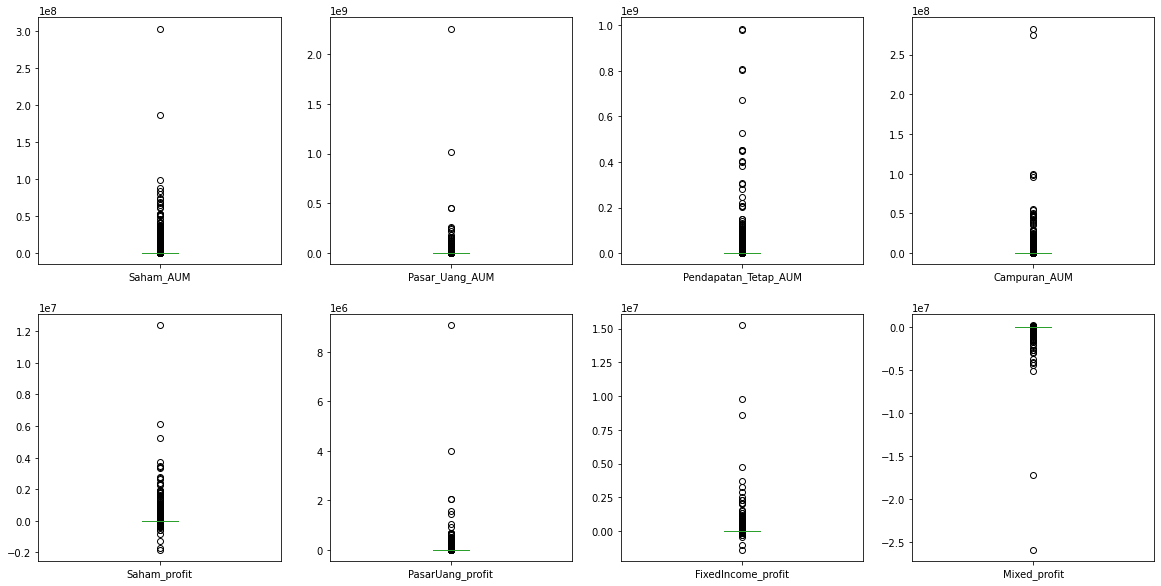

In [ ]:
numerical_column = ['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM',
                    'Saham_profit','PasarUang_profit','FixedIncome_profit','Mixed_profit']

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for nomor, kolom in enumerate(numerical_column):
  df1_drop.boxplot(kolom, ax=axes.flatten()[nomor],grid=False)
plt.show()

All of them have outliers. We will check using < Q1 - 1,5 IQR and > Q3 + 1,5 IQR, but we cannot remove all outliers because it might remove significant amount of data. Therefore we chose 1 column to remove the outlier.

In [ ]:
# Calculate quartile 1 and 3
Q1 = df1_drop['Pasar_Uang_AUM'].quantile(0.25)
Q3 = df1_drop['Pasar_Uang_AUM'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 100296.0

IQR:
 100296.0

Min:
 -150444.0

Max:
 250740.0


In [ ]:
min = df1_drop['Pasar_Uang_AUM']<boxplot_min
max = df1_drop['Pasar_Uang_AUM']>boxplot_max

df1_out = df1_drop[
    (min | max)
    ]

df1_out

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,Campuran_AUM,Campuran_invested_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Saham_profit_%,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%
2,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1,2,...,0,0,312900,4013,-423,0,312900,4013,-423,0
3,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,1,2,...,0,0,584774,11474,28351,0,584774,11474,28351,0
11,3718933,2021-08-09,Male,50,Pengusaha,> Rp 100 Juta - 500 Juta,did not use,Keuntungan Bisnis,1,2,...,0,0,-19074,569,6452,0,-19074,569,6452,0
20,3722610,2021-08-02,Male,50,Swasta,> Rp 100 Juta - 500 Juta,did not use,Gaji,1,2,...,0,0,61871,7740,0,0,61871,7740,0,0
31,3787202,2021-09-02,Female,53,Swasta,> Rp 100 Juta - 500 Juta,did not use,Gaji,0,1,...,0,0,81407,660,6287,0,81407,660,6287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16748,3965617,2021-09-03,Female,49,IRT,> Rp 100 Juta - 500 Juta,did not use,Keuntungan Bisnis,0,1,...,0,0,133997,2389,7449,0,133997,2389,7449,0
16749,3765807,2021-08-05,Male,49,Pengusaha,> Rp 500 Juta - 1 Miliar,did not use,Keuntungan Bisnis,1,2,...,0,0,448481,11615,18405,0,448481,11615,18405,0
16750,3765807,2021-08-05,Male,49,Pengusaha,> Rp 500 Juta - 1 Miliar,did not use,Keuntungan Bisnis,1,2,...,0,0,442640,33871,83903,0,442640,33871,83903,0
16759,3881981,2021-08-22,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,did not use,Keuntungan Bisnis,1,2,...,0,0,552649,20409,-26032,0,552649,20409,-26032,0


In [ ]:
2466 / 16761 * 100

14.712725971004117

The outliers is 14% of the original data, therefore we decided no to remove the outliers to keep the amount of data.

## Check Categorical Data Proportion

###User occupation proportion

In [ ]:
df1_drop['user_occupation'].value_counts()

Pelajar       9063
Swasta        3779
Others        1879
IRT            968
Pengusaha      658
PNS            232
Guru           122
TNI/Polisi      52
Pensiunan        8
Name: user_occupation, dtype: int64

Group PNS, Guru, TNI/Polisi, Pensiunan as Others because the total number is small compare to others.

In [ ]:
df1_drop.loc[df1_drop['user_occupation'] == 'PNS', 'user_occupation'] = 'Others'
df1_drop.loc[df1_drop['user_occupation'] == 'Guru', 'user_occupation'] = 'Others'
df1_drop.loc[df1_drop['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'Others'
df1_drop.loc[df1_drop['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'Others'

In [ ]:
df1_drop['user_occupation'].value_counts()

Pelajar      9063
Swasta       3779
Others       2293
IRT           968
Pengusaha     658
Name: user_occupation, dtype: int64

###User income range proportion

In [ ]:
df1_drop['user_income_range'].value_counts()

< 10 Juta                   7143
Rp 10 Juta - 50 Juta        5476
> Rp 50 Juta - 100 Juta     2719
> Rp 100 Juta - 500 Juta    1291
> Rp 500 Juta - 1 Miliar      99
> Rp 1 Miliar                 33
Name: user_income_range, dtype: int64

Group income range above Rp 100 million in one group as "> Rp 100 Juta" because the total number is also small compare to others.

In [ ]:
df1_drop.loc[df1_drop['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = '> Rp 100 Juta'
df1_drop.loc[df1_drop['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'
df1_drop.loc[df1_drop['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'

In [ ]:
df1_drop['user_income_range'].value_counts()

< 10 Juta                  7143
Rp 10 Juta - 50 Juta       5476
> Rp 50 Juta - 100 Juta    2719
> Rp 100 Juta              1423
Name: user_income_range, dtype: int64

## Encode Categorical Data

In [ ]:
df_reg = df1_drop.copy()
df_reg.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,Campuran_AUM,Campuran_invested_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Saham_profit_%,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,0,0,7141,235,673,0,7141,235,673,0
1,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,0,0,20432,372,2468,0,20432,372,2468,0
2,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,0,0,312900,4013,-423,0,312900,4013,-423,0
3,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,0,0,584774,11474,28351,0,584774,11474,28351,0
4,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1,2,...,910285,899000,1545,-3,-75,11285,1545,-3,-75,11285


### One Hot Encoding Gender column

Using One-Hot because consists of only 2 types of value, female or male.

In [ ]:
dum_gender = pd.get_dummies(df_reg, columns=['user_gender'], prefix=['user_gender'])
df_reg = df_reg.merge(dum_gender)
df_reg

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Saham_profit_%,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%,user_gender_Female,user_gender_Male
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,7141,235,673,0,7141,235,673,0,1,0
1,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,20432,372,2468,0,20432,372,2468,0,1,0
2,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,312900,4013,-423,0,312900,4013,-423,0,1,0
3,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,584774,11474,28351,0,584774,11474,28351,0,1,0
4,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1,2,...,1545,-3,-75,11285,1545,-3,-75,11285,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16756,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,9836,1045,596,0,9836,1045,596,0,0,1
16757,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,0,0,0,0,0,0,0,0,1
16758,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,0,0,0,0,0,0,0,0,1
16759,3881981,2021-08-22,Female,49,Pengusaha,> Rp 100 Juta,did not use,Keuntungan Bisnis,1,2,...,552649,20409,-26032,0,552649,20409,-26032,0,1,0


### One Hot Encoding Occupation Column

In [ ]:
dum_occ = pd.get_dummies(df_reg, columns=['user_occupation'], prefix=['user_occupation'])
df_reg = df_reg.merge(dum_occ)
df_reg

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,PasarUang_profit_%,FixedIncome_profit_%,Mixed_profit_%,user_gender_Female,user_gender_Male,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,235,673,0,1,0,1,0,0,0,0
1,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,372,2468,0,1,0,1,0,0,0,0
2,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,4013,-423,0,1,0,0,1,0,0,0
3,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,11474,28351,0,1,0,0,1,0,0,0
4,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1,2,...,-3,-75,11285,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16756,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,1045,596,0,0,1,0,0,0,0,1
16757,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,0,0,0,1,0,1,0,0,0
16758,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,0,0,0,1,0,1,0,0,0
16759,3881981,2021-08-22,Female,49,Pengusaha,> Rp 100 Juta,did not use,Keuntungan Bisnis,1,2,...,20409,-26032,0,1,0,0,0,0,1,0


### Label Encoding User Income Range Column

In [ ]:
df_reg['user_income_range'].unique()

array(['> Rp 50 Juta - 100 Juta', '> Rp 100 Juta', '< 10 Juta',
       'Rp 10 Juta - 50 Juta'], dtype=object)

In [ ]:
df_reg['user_income_range'] = df_reg['user_income_range'].astype('category')
df_reg['income_range'] = df_reg['user_income_range'].cat.set_categories(["< 10 Juta", "Rp 10 Juta - 50 Juta", "> Rp 50 Juta - 100 Juta","> Rp 100 Juta"], ordered=True)
df_reg['income_range'] = df_reg['income_range'].cat.codes
df_reg

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,FixedIncome_profit_%,Mixed_profit_%,user_gender_Female,user_gender_Male,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,income_range
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,673,0,1,0,1,0,0,0,0,2
1,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,2468,0,1,0,1,0,0,0,0,2
2,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,-423,0,1,0,0,1,0,0,0,3
3,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,28351,0,1,0,0,1,0,0,0,3
4,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1,2,...,-75,11285,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16756,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,596,0,0,1,0,0,0,0,1,2
16757,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,0,0,1,0,1,0,0,0,3
16758,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,0,0,1,0,1,0,0,0,3
16759,3881981,2021-08-22,Female,49,Pengusaha,> Rp 100 Juta,did not use,Keuntungan Bisnis,1,2,...,-26032,0,1,0,0,0,0,1,0,3


### One Hot Encoding Referral Code Column

In [ ]:
dum_ref_code = pd.get_dummies(df_reg, columns=['referral_code_used'], prefix=['referral_code_used'])
df_reg = df_reg.merge(dum_ref_code)
df_reg

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,user_gender_Female,user_gender_Male,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,income_range,referral_code_used_did not use,referral_code_used_used referral
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,1,0,1,0,0,0,0,2,1,0
1,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,1,0,1,0,0,0,0,2,1,0
2,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,1,0,0,1,0,0,0,3,0,1
3,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,1,0,0,1,0,0,0,3,0,1
4,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1,2,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16756,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,0,1,0,0,0,0,1,2,1,0
16757,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,1,0,1,0,0,0,3,1,0
16758,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,1,0,1,0,0,0,3,1,0
16759,3881981,2021-08-22,Female,49,Pengusaha,> Rp 100 Juta,did not use,Keuntungan Bisnis,1,2,...,1,0,0,0,0,1,0,3,1,0


In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16761 entries, 0 to 16760
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           16761 non-null  object        
 1   registration_import_datetime      16761 non-null  datetime64[ns]
 2   user_gender                       16761 non-null  object        
 3   user_age                          16761 non-null  int64         
 4   user_occupation                   16761 non-null  object        
 5   user_income_range                 16761 non-null  category      
 6   referral_code_used                16761 non-null  object        
 7   user_income_source                16761 non-null  object        
 8   delta_sept                        16761 non-null  int64         
 9   delta_oct                         16761 non-null  int64         
 10  flag_order_bond                   16761 non-nu

In [ ]:
df_reg.isna().sum()

user_id                             0
registration_import_datetime        0
user_gender                         0
user_age                            0
user_occupation                     0
user_income_range                   0
referral_code_used                  0
user_income_source                  0
delta_sept                          0
delta_oct                           0
flag_order_bond                     0
bond_units_ordered                  0
date                                0
Saham_AUM                           0
Saham_invested_amount               0
Pasar_Uang_AUM                      0
Pasar_Uang_invested_amount          0
Pendapatan_Tetap_AUM                0
Pendapatan_Tetap_invested_amount    0
Campuran_AUM                        0
Campuran_invested_amount            0
Saham_profit                        0
PasarUang_profit                    0
FixedIncome_profit                  0
Mixed_profit                        0
Saham_profit_%                      0
PasarUang_pr

##EDA

###% Users Ordered Bond in Sept 2021

In [ ]:
EDA_1 = df_reg.copy()

In [ ]:
EDA_1 = EDA_1.groupby('flag_order_bond')['user_id'].agg('count').reset_index()
EDA_1.columns = ['flag_order_bond','Num of User']
EDA_1

,flag_order_bond,Num of User
0,0,9824
1,1,6937


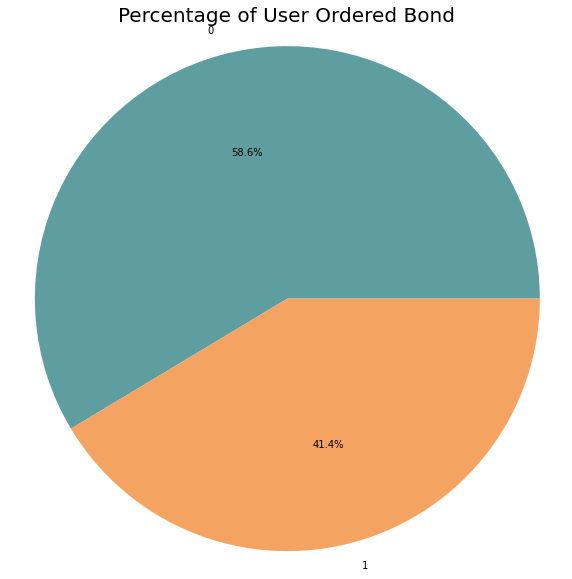

In [ ]:
plt.figure(figsize=(10, 10))

data = EDA_1['Num of User']
labels = EDA_1['flag_order_bond']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('cadetblue','sandybrown'))
plt.title('Percentage of User Ordered Bond', fontsize=20)
plt.axis('equal')
plt.savefig('% bond orders.png', bbox_inches='tight')

**Most of our user did not order government bonds in Sept 2021.**

###Average AUM at the end of month

In [ ]:
EDA_2 = df_reg[['date','Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']].copy()
EDA_2['Month'] = EDA_2['date'].dt.month_name()
EDA_2

,date,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM,Month
0,2021-09-30,297141,40235,270673,0,September
1,2021-10-29,310432,40372,272468,0,October
2,2021-09-30,9232900,1354013,3229577,0,September
3,2021-10-29,19034774,2831474,5658351,0,October
4,2021-09-30,41545,9997,49925,910285,September
...,...,...,...,...,...,...
16756,2021-10-29,219836,131045,95596,0,October
16757,2021-09-30,0,0,0,0,September
16758,2021-10-29,0,0,0,0,October
16759,2021-09-30,20552649,10120409,40973968,0,September


In [ ]:
EDA_2 = EDA_2.groupby('Month')[['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']].agg('mean').reset_index()
EDA_2.columns = ['Month','Stocks','Money Market','Fixed Income','Mixed']
EDA_2

,Month,Stocks,Money Market,Fixed Income,Mixed
0,October,682385.772041,1.099242e+06,1.489148e+06,201854.936469
1,September,347369.224357,7.856005e+05,1.263754e+06,183663.252869


In [ ]:
EDA_2tf = EDA_2.copy()
EDA_2tf = EDA_2tf.melt('Month', var_name='column', value_name='value')
EDA_2tf

,Month,column,value
0,October,Stocks,6.823858e+05
1,September,Stocks,3.473692e+05
2,October,Money Market,1.099242e+06
3,September,Money Market,7.856005e+05
4,October,Fixed Income,1.489148e+06
5,September,Fixed Income,1.263754e+06
6,October,Mixed,2.018549e+05
7,September,Mixed,1.836633e+05


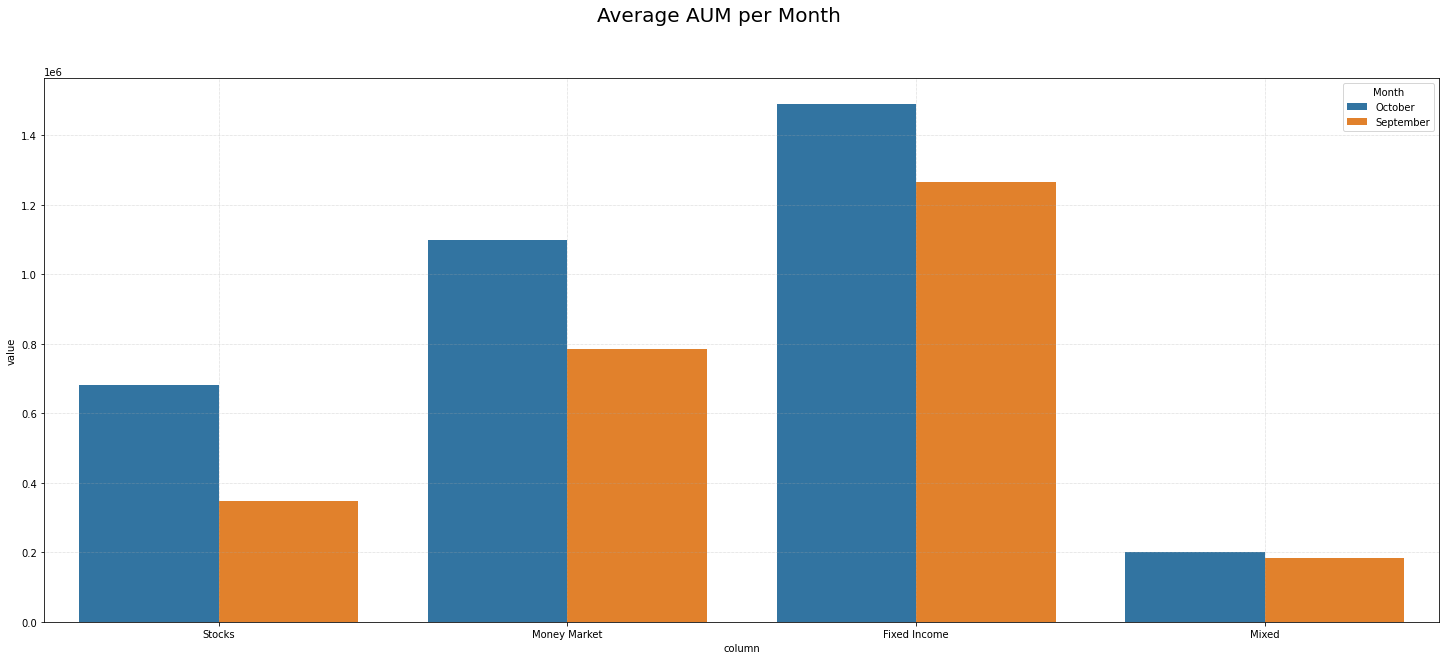

In [ ]:
# create the visualization of the data
fig = plt.figure(figsize=(25, 10)) #to set the figure size

fig.suptitle('Average AUM per Month', fontsize=20) # to set the chart title and its font size
sns.barplot(data = EDA_2tf, x = 'column', y = 'value', hue = 'Month')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.savefig('avg AUM per mth.png', bbox_inches='tight')

**Average AUM for all producst increased from September to October.**

###Average Profit % at the end of month

In [ ]:
EDA_3 = df_reg[['date','Saham_profit','PasarUang_profit','FixedIncome_profit','Mixed_profit']].copy()
EDA_3['Month'] = EDA_3['date'].dt.month_name()
EDA_3

,date,Saham_profit,PasarUang_profit,FixedIncome_profit,Mixed_profit,Month
0,2021-09-30,7141,235,673,0,September
1,2021-10-29,20432,372,2468,0,October
2,2021-09-30,312900,4013,-423,0,September
3,2021-10-29,584774,11474,28351,0,October
4,2021-09-30,1545,-3,-75,11285,September
...,...,...,...,...,...,...
16756,2021-10-29,9836,1045,596,0,October
16757,2021-09-30,0,0,0,0,September
16758,2021-10-29,0,0,0,0,October
16759,2021-09-30,552649,20409,-26032,0,September


In [ ]:
EDA_3 = EDA_3.groupby('Month')[['Saham_profit','PasarUang_profit','FixedIncome_profit','Mixed_profit']].agg('mean').reset_index()
EDA_3.columns = ['Month','Stocks','Money Market','Fixed Income','Mixed']
EDA_3

,Month,Stocks,Money Market,Fixed Income,Mixed
0,October,22847.284064,5213.562471,10972.435526,-9905.835691
1,September,10921.420321,2251.977649,2930.247795,-5910.545487


In [ ]:
EDA_3tf = EDA_3.copy()
EDA_3tf = EDA_3tf.melt('Month', var_name='column', value_name='value')
EDA_3tf

,Month,column,value
0,October,Stocks,22847.284064
1,September,Stocks,10921.420321
2,October,Money Market,5213.562471
3,September,Money Market,2251.977649
4,October,Fixed Income,10972.435526
5,September,Fixed Income,2930.247795
6,October,Mixed,-9905.835691
7,September,Mixed,-5910.545487


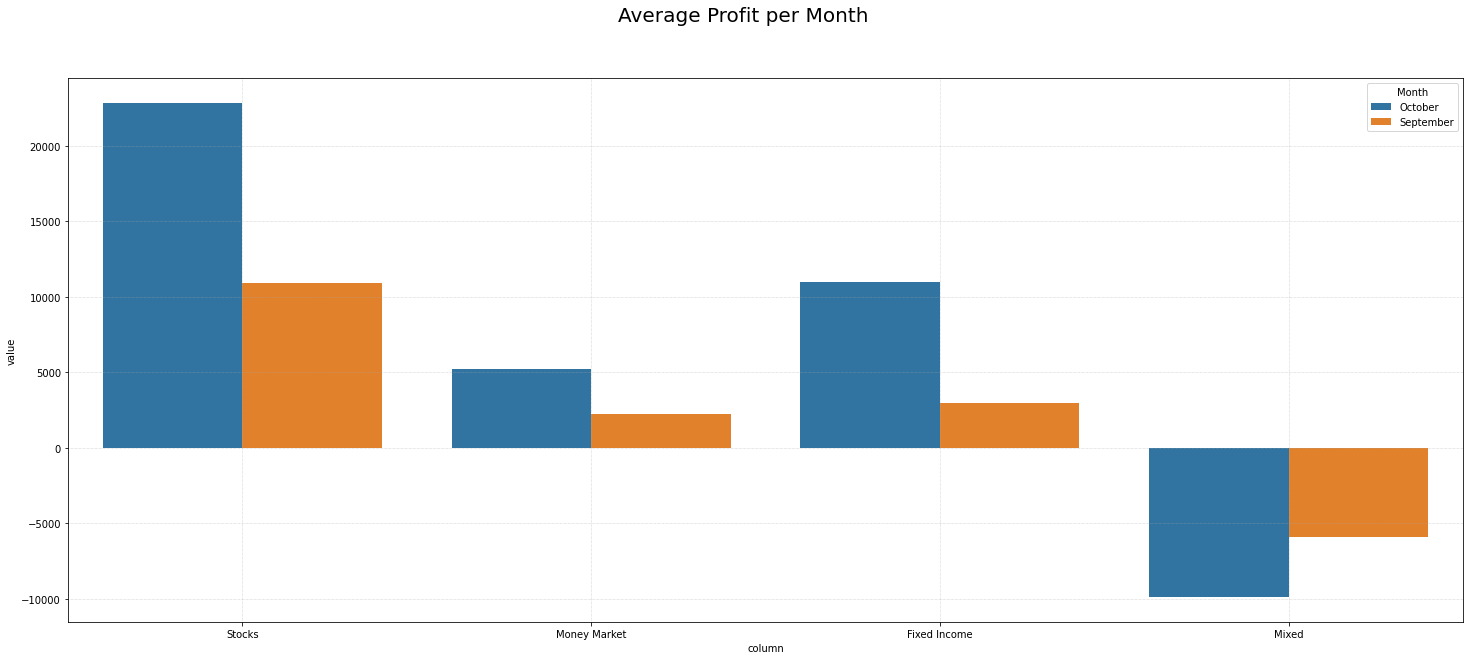

In [ ]:
# create the visualization of the data
fig = plt.figure(figsize=(25, 10)) #to set the figure size

fig.suptitle('Average Profit per Month', fontsize=20) # to set the chart title and its font size
sns.barplot(data = EDA_3tf, x = 'column', y = 'value', hue = 'Month')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.savefig('avg profit per mth.png', bbox_inches='tight')

**Average profit increased for all products, except for mixed mutual funds.**

## Create df Sept 21

In [ ]:
sept_df = df_reg.copy()
sept_df = sept_df.loc[(sept_df['date'] == '2021-09-30')]
sept_df

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,user_gender_Female,user_gender_Male,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,income_range,referral_code_used_did not use,referral_code_used_used referral
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,1,0,1,0,0,0,0,2,1,0
2,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,1,0,0,1,0,0,0,3,0,1
4,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1,2,...,0,1,0,0,0,0,1,0,1,0
6,3836491,2021-08-18,Male,59,Others,< 10 Juta,used referral,Lainnya,1,2,...,0,1,0,1,0,0,0,0,0,1
8,3783302,2021-09-14,Male,57,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,0,1,...,0,1,0,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16751,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta,did not use,Lainnya,1,2,...,0,1,0,0,0,0,1,3,1,0
16753,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,1,2,...,1,0,1,0,0,0,0,1,0,1
16755,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,0,1,0,0,0,0,1,2,1,0
16757,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,1,0,1,0,0,0,3,1,0


In [ ]:
sept_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 16759
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8277 non-null   object        
 1   registration_import_datetime      8277 non-null   datetime64[ns]
 2   user_gender                       8277 non-null   object        
 3   user_age                          8277 non-null   int64         
 4   user_occupation                   8277 non-null   object        
 5   user_income_range                 8277 non-null   category      
 6   referral_code_used                8277 non-null   object        
 7   user_income_source                8277 non-null   object        
 8   delta_sept                        8277 non-null   int64         
 9   delta_oct                         8277 non-null   int64         
 10  flag_order_bond                   8277 non-null

##Create df Oct 21

In [ ]:
oct_df = df_reg.copy()
oct_df = oct_df.loc[(oct_df['date'] == '2021-10-29')]
oct_df

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,user_gender_Female,user_gender_Male,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,income_range,referral_code_used_did not use,referral_code_used_used referral
1,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,1,0,1,0,0,0,0,2,1,0
3,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,1,0,0,1,0,0,0,3,0,1
5,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1,2,...,0,1,0,0,0,0,1,0,1,0
7,3836491,2021-08-18,Male,59,Others,< 10 Juta,used referral,Lainnya,1,2,...,0,1,0,1,0,0,0,0,0,1
9,3783302,2021-09-14,Male,57,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,0,1,...,0,1,0,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16752,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta,did not use,Lainnya,1,2,...,0,1,0,0,0,0,1,3,1,0
16754,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,1,2,...,1,0,1,0,0,0,0,1,0,1
16756,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,0,1,0,0,0,0,1,2,1,0
16758,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,1,0,1,0,0,0,3,1,0


In [ ]:
oct_df['date'].unique()

array(['2021-10-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
oct_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8484 entries, 1 to 16760
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           8484 non-null   object        
 1   registration_import_datetime      8484 non-null   datetime64[ns]
 2   user_gender                       8484 non-null   object        
 3   user_age                          8484 non-null   int64         
 4   user_occupation                   8484 non-null   object        
 5   user_income_range                 8484 non-null   category      
 6   referral_code_used                8484 non-null   object        
 7   user_income_source                8484 non-null   object        
 8   delta_sept                        8484 non-null   int64         
 9   delta_oct                         8484 non-null   int64         
 10  flag_order_bond                   8484 non-null

##Correlation

In [ ]:
corr_column = sept_df.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(corr_column) - set(['flag_order_bond']))
corr_column

['Pendapatan_Tetap_AUM',
 'referral_code_used_did not use',
 'PasarUang_profit',
 'user_occupation_Others',
 'PasarUang_profit_%',
 'Pasar_Uang_invested_amount',
 'Campuran_AUM',
 'user_occupation_IRT',
 'delta_sept',
 'FixedIncome_profit',
 'Saham_profit',
 'user_occupation_Pelajar',
 'referral_code_used_used referral',
 'user_occupation_Pengusaha',
 'Mixed_profit',
 'income_range',
 'FixedIncome_profit_%',
 'delta_oct',
 'user_age',
 'bond_units_ordered',
 'user_occupation_Swasta',
 'Campuran_invested_amount',
 'Saham_AUM',
 'user_gender_Female',
 'Saham_profit_%',
 'user_gender_Male',
 'Pasar_Uang_AUM',
 'Pendapatan_Tetap_invested_amount',
 'Mixed_profit_%',
 'Saham_invested_amount']

In [ ]:
sept_df[corr_column]

,Pendapatan_Tetap_AUM,referral_code_used_did not use,PasarUang_profit,user_occupation_Others,PasarUang_profit_%,Pasar_Uang_invested_amount,Campuran_AUM,user_occupation_IRT,delta_sept,FixedIncome_profit,...,user_occupation_Swasta,Campuran_invested_amount,Saham_AUM,user_gender_Female,Saham_profit_%,user_gender_Male,Pasar_Uang_AUM,Pendapatan_Tetap_invested_amount,Mixed_profit_%,Saham_invested_amount
0,270673,1,235,0,235,40000,0,1,1,673,...,0,0,297141,1,7141,0,40235,270000,0,290000
2,3229577,0,4013,1,4013,1350000,0,0,1,-423,...,0,0,9232900,1,312900,0,1354013,3230000,0,8920000
4,49925,1,-3,0,-3,10000,910285,0,1,-75,...,1,899000,41545,0,1545,1,9997,50000,11285,40000
6,0,0,12,1,12,10000,0,0,1,0,...,0,0,0,0,0,1,10012,0,0,0
8,107322,1,0,0,0,0,0,0,0,-3109,...,1,0,0,0,0,1,0,110431,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16751,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
16753,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
16755,95113,1,676,0,676,130000,0,0,1,113,...,1,0,208469,0,-1531,1,130676,95000,0,210000
16757,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


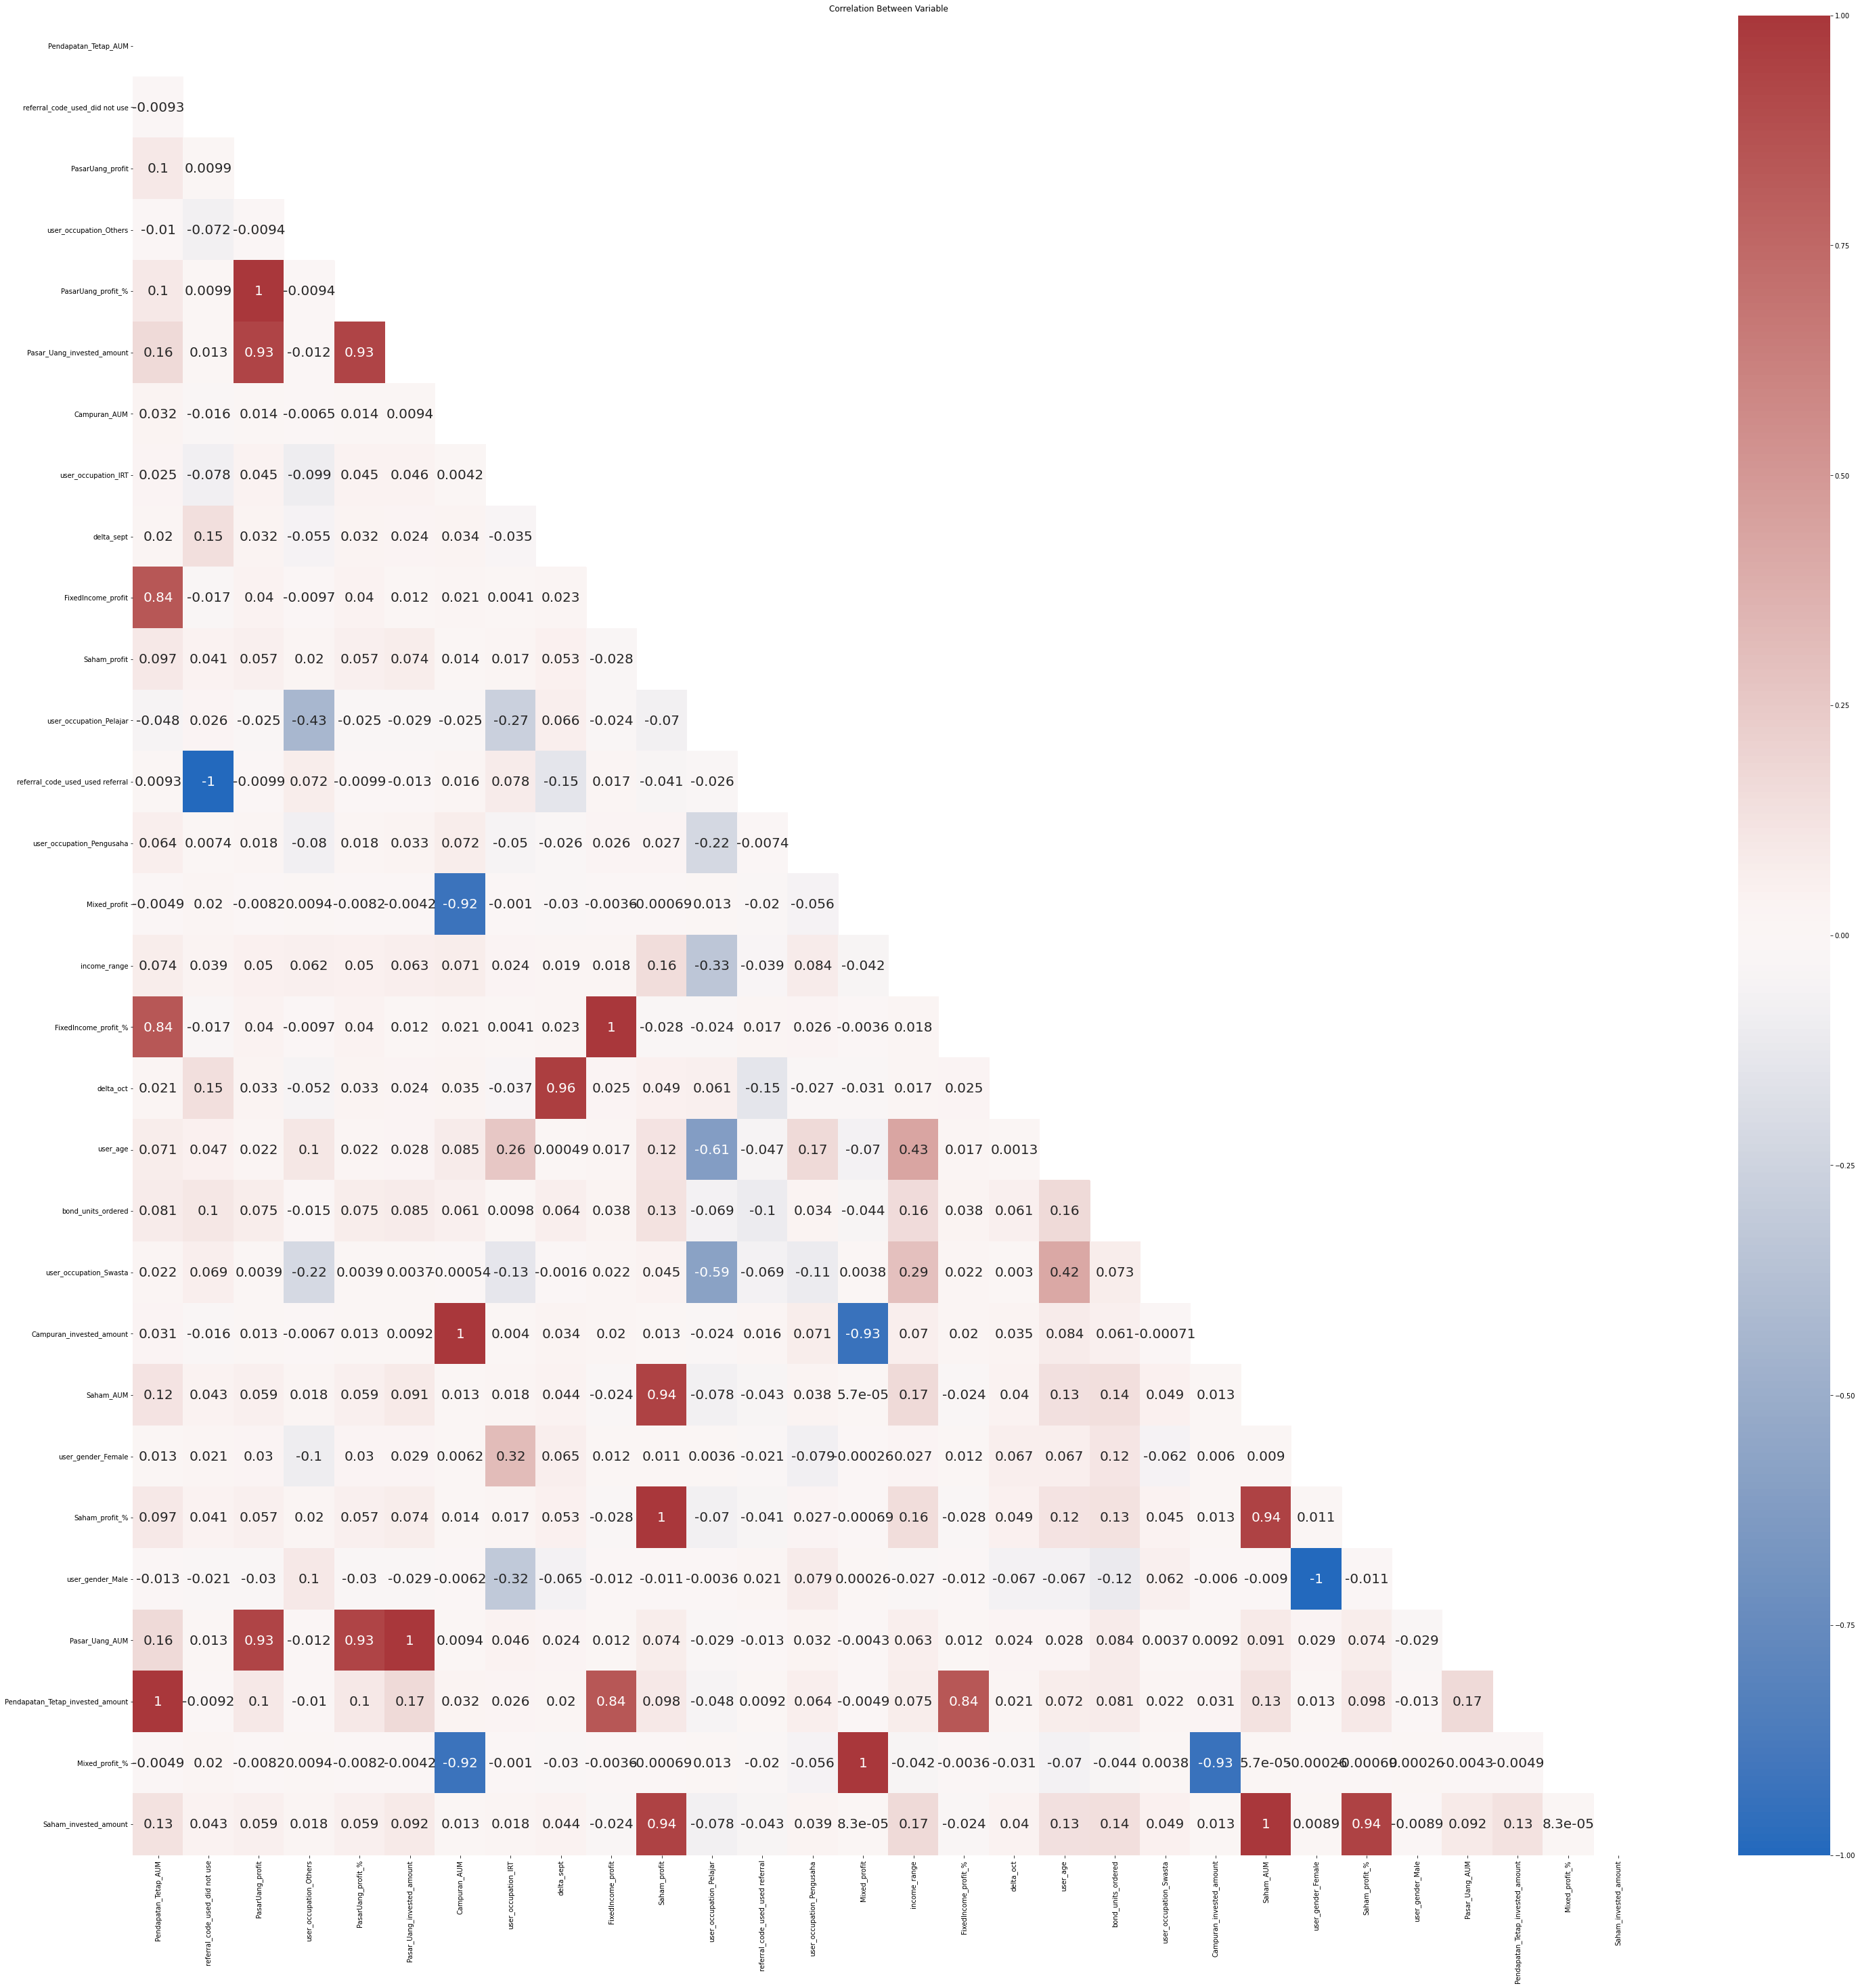

In [ ]:
fig = plt.figure(figsize=(50,50))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    sept_df[corr_column].corr(), dtype=np.bool))

sns.heatmap(sept_df[corr_column].corr(),vmin=-1,
            vmax=1,cmap='vlag',annot=True,mask=mask,
            annot_kws={"fontsize":20})

plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = sept_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['delta_oct',
 'bond_units_ordered',
 'Saham_invested_amount',
 'Pasar_Uang_invested_amount',
 'Pendapatan_Tetap_invested_amount',
 'Campuran_invested_amount',
 'Saham_profit',
 'PasarUang_profit',
 'FixedIncome_profit',
 'Mixed_profit',
 'Saham_profit_%',
 'PasarUang_profit_%',
 'FixedIncome_profit_%',
 'Mixed_profit_%',
 'user_gender_Male',
 'referral_code_used_used referral']

In [ ]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

['Pendapatan_Tetap_AUM',
 'referral_code_used_did not use',
 'user_occupation_Others',
 'user_age',
 'Saham_AUM',
 'user_occupation_Swasta',
 'Campuran_AUM',
 'user_occupation_IRT',
 'delta_sept',
 'user_occupation_Pelajar',
 'Pasar_Uang_AUM',
 'user_occupation_Pengusaha',
 'income_range',
 'user_gender_Female']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


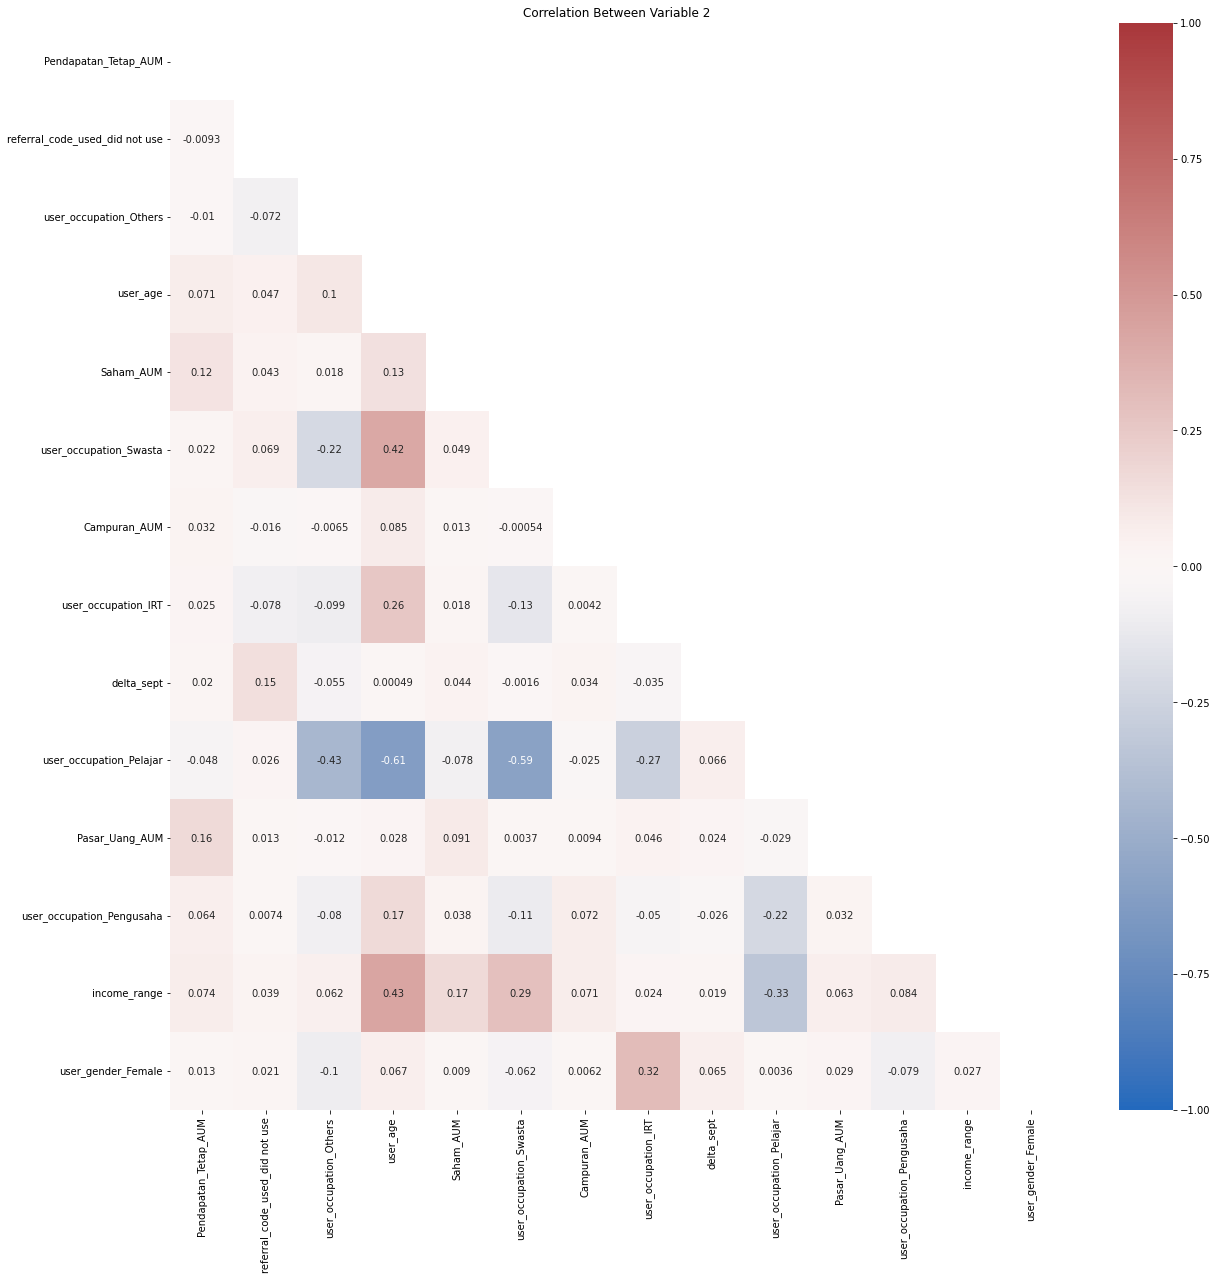

In [ ]:
corr_column_new = to_keep

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable 2')

mask = np.triu(np.ones_like(
    sept_df[corr_column_new].corr(), dtype=np.bool))
sns.heatmap(sept_df[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='vlag',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
to_keep_vars = list(set(to_keep) - set(['flag_order_bond']))
to_keep_vars

['Pendapatan_Tetap_AUM',
 'referral_code_used_did not use',
 'user_occupation_Others',
 'user_age',
 'Saham_AUM',
 'user_occupation_Swasta',
 'Campuran_AUM',
 'user_occupation_IRT',
 'delta_sept',
 'user_occupation_Pelajar',
 'Pasar_Uang_AUM',
 'user_occupation_Pengusaha',
 'income_range',
 'user_gender_Female']

In [ ]:
# Define the whole data
x = sept_df[to_keep_vars]
y = sept_df[['flag_order_bond']]

# Split into training and test dataset
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(6621, 14)
(1656, 14)
(6621, 1)
(1656, 1)


In [ ]:
# Check class balance in each datasets
for df in [y_training,y_test]:
  df2 = df.value_counts()
  print(df2)

flag_order_bond
0                  3861
1                  2760
dtype: int64
flag_order_bond
0                  948
1                  708
dtype: int64


In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_training, y_training)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
# Accuracy dari prediksi model dengan data training
model.score(x_training, y_training)

0.6675728741881891

In [ ]:
print('intercept:', model.intercept_)

intercept: [-4.59947663e-12]


In [ ]:
print('slope:', model.coef_)

slope: [[ 2.59407709e-07 -6.33076102e-13 -7.37493979e-13 -7.40396672e-11
   2.42670334e-07  1.53458186e-13  2.22590875e-08 -6.60297635e-14
  -2.09997213e-12 -3.88176429e-12  1.70763779e-07 -6.76467791e-14
  -5.69799757e-13  3.33647929e-13]]


**y = ab + cx1 + ... + cxn**

ab = -4.599 * (flag order bonds)


cx1 = -6.331 * (referral_code_used_did not use)

cx2 = -5.698 * (income_range)

cx3 = -7.375 * (user_occupation_Others)

cx4 = 3.365 * (user_gender_Female)

cx5 = 2.226 * (Campuran_AUM)

cx6 = -6.603 * (user_occupation_IRT)

cx7 = 2.594 * (Pendapatan_Tetap_AUM)

cx8 = -2.099 * (delta_sept)

cx9 = 2.427 * (Saham_AUM)

cx10 = 1.707 * (Pasar_Uang_AUM)
 
cx11 = -6.765 * (user_occupation_Pengusaha)

cx12 = -7.404 * (user_age)

cx13 = 1.535 * (user_occupation_Swasta)

cx14 = -3.882 * (user_occupation_Pelajar)

**Summary of Variables Coefficient**

* Variables decreasing the probability of bonds purchasing: Referral code used, Income Range, User Occupation - Others, User Occupation - IRT, delta Sept, User Occupation - Pengusaha, User age, User Occupation - Pelajar
* Variable increasing the probability of bonds purchasing: User gender - Female, Campuran AUM, Saham AUM, Pasar Uang AUM, User Occupation - Swasta

**Interpretation:**

Users who are more likely to purchase govt bonds are those who are female, investing in stocks, money market and mixed mutual funds, and working as corporate employee.

###Confusion Matrix

In [ ]:
# confusion_matrix(buy bonds actual, buy bonds prediksi)
confusion_matrix(y_training, model.predict(x_training))

array([[1663, 2198],
       [   3, 2757]])

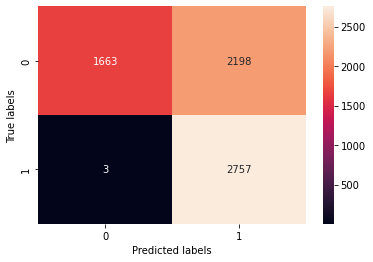

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['Not Buying','Buy']))

              precision    recall  f1-score   support

  Not Buying       1.00      0.43      0.60      3861
         Buy       0.56      1.00      0.71      2760

    accuracy                           0.67      6621
   macro avg       0.78      0.71      0.66      6621
weighted avg       0.81      0.67      0.65      6621



###Performance of the model on test set

In [ ]:
model.score(x_test, y_test)

0.6672705314009661

In [ ]:
confusion_matrix(y_test, model.predict(x_test))

array([[397, 551],
       [  0, 708]])

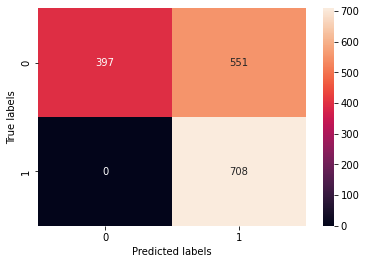

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
print(classification_report(y_test, model.predict(x_test), target_names=['Not Buying','Buy']))

              precision    recall  f1-score   support

  Not Buying       1.00      0.42      0.59       948
         Buy       0.56      1.00      0.72       708

    accuracy                           0.67      1656
   macro avg       0.78      0.71      0.66      1656
weighted avg       0.81      0.67      0.65      1656



##Predict Oct 2021 using the model

In [ ]:
oct_df

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,delta_sept,delta_oct,...,user_gender_Female,user_gender_Male,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,income_range,referral_code_used_did not use,referral_code_used_used referral
1,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,1,0,1,0,0,0,0,2,1,0
3,3802293,2021-08-15,Female,47,Others,> Rp 100 Juta,used referral,Gaji,1,2,...,1,0,0,1,0,0,0,3,0,1
5,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,did not use,Gaji,1,2,...,0,1,0,0,0,0,1,0,1,0
7,3836491,2021-08-18,Male,59,Others,< 10 Juta,used referral,Lainnya,1,2,...,0,1,0,1,0,0,0,0,0,1
9,3783302,2021-09-14,Male,57,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,0,1,...,0,1,0,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16752,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta,did not use,Lainnya,1,2,...,0,1,0,0,0,0,1,3,1,0
16754,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,1,2,...,1,0,1,0,0,0,0,1,0,1
16756,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,1,2,...,0,1,0,0,0,0,1,2,1,0
16758,3812221,2021-08-11,Male,49,Others,> Rp 100 Juta,did not use,Gaji,1,2,...,0,1,0,1,0,0,0,3,1,0


In [ ]:
x = oct_df[to_keep_vars]
y = oct_df[['flag_order_bond']]

In [ ]:
y

,flag_order_bond
1,0
3,0
5,0
7,0
9,0
...,...
16752,0
16754,0
16756,1
16758,0


In [ ]:
predicted_prob = model.predict_proba(x)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

,predicted_score
0,0.538152
1,0.998601
2,0.516625
3,0.500000
4,0.507165
...,...
8479,0.500000
8480,0.500000
8481,0.525110
8482,0.500000


In [ ]:
# Get 30% threshold
pct30_threshold = predicted_prob['predicted_score'].quantile(0.4) 

# Get top 30% customers
pct30_customer = predicted_prob[predicted_prob['predicted_score'] > pct30_threshold]

# Merge with actual churn outcome 
pct30_customer = pct30_customer.merge(y, left_index = True, right_index = True)
pct30_customer

,predicted_score,flag_order_bond
1,0.998601,0
5,0.791190,0
7,0.502151,0
11,0.513148,1
15,0.986552,1
...,...,...
8468,0.506548,0
8470,0.563117,1
8474,0.999867,0
8476,0.906346,0


In [ ]:
pct30_customer['flag_order_bond'].value_counts()

0    1680
1     885
Name: flag_order_bond, dtype: int64

##Summary:##

There are 885 customers that will buy the next round government bonds offering.


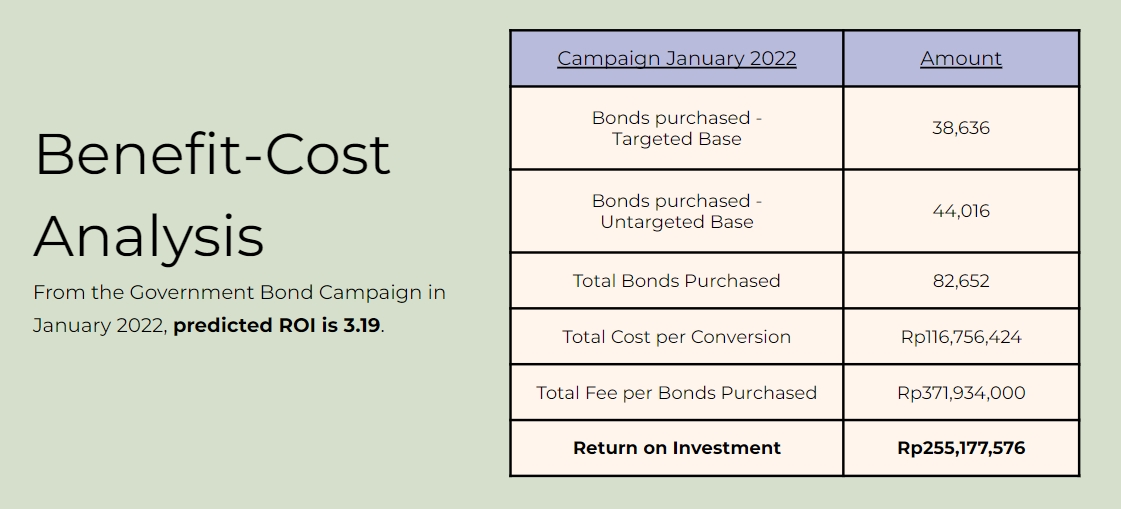